# UMC 203: Artificial Intelligence and Machine Learning
# Assignment 1



## Setup

Please run the code below *after modifying it* appropriately every time you connect to an environment.

In [2]:
# 1. [TODO by yourself] Upload the zip file provided as part of the assignment onto your google drive. Do this by uploading the file to your drive.
# 2. Connect the google drive to the colab
from google.colab import drive
drive.mount('/content/drive')
# 3. copy the zip file into the current working directory
!cp /content/drive/MyDrive/AIML_A1.zip .
# eg. !cp /content/drive/MyDrive/AIML_A1.zip .
# extract the zip file
!unzip AIML_A1.zip
# eg. !unzip A1.zip

Mounted at /content/drive
Archive:  AIML_A1.zip
   creating: pyarmor_runtime_000000/
  inflating: pyarmor_runtime_000000/pyarmor_runtime.so  
  inflating: pyarmor_runtime_000000/__init__.py  
   creating: pyarmor_runtime_000000/__pycache__/
  inflating: pyarmor_runtime_000000/__pycache__/__init__.cpython-311.pyc  
  inflating: diabetes.csv            
  inflating: oracle.py               


In [3]:
import oracle as AIML_A1

## Question 1: Naive Bayes

In [ ]:
# Instructions and calling conventions for the different functions

# PLEASE PROVIDE YOUR OWN SR NUMBERS TO ALL FUNCTIONS
mysrn = 22205

# q1_get_loss provides l(0,1) and l(1,0) in the setting discussed in the assignment
# help(AIML_A1.q1_get_loss)
# eg:
l1, l2 = AIML_A1.q1_get_loss(mysrn)
print(f"l(0,1)={l1}, l(1,0)={l2}")

# q1_get_train_set returns a training set wih the number of required samples
# help(AIML_A1.q1_get_train_set)
q1_train_data = AIML_A1.q1_get_train_set(mysrn,1)
print(q1_train_data)

# q1_get_test_set returns the test set
# help(AIML_A1.q1_get_test_set)
q1_test_data = AIML_A1.q1_get_test_set(mysrn)


l(0,1)=5, l(1,0)=3
[(array([-0.19276,  1.85458, -3.17599, -1.00722, -3.12217]), 0.0), (array([ 0.59744,  0.8383 ,  2.6052 , -0.56367, -0.25924]), 1.0)]


In [ ]:
import numpy as np

def mean(data):
  samples_0 = [data[i][0] for i in range(len(data)) if data[i][1] == 0]
  samples_1 = [data[i][0] for i in range(len(data)) if data[i][1] == 1]

  mean_0 = np.mean(samples_0,axis=0)
  mean_1 = np.mean(samples_1,axis=0)

  return mean_0, mean_1

def var(data):
  samples_0 = [data[i][0] for i in range(len(data)) if data[i][1] == 0]
  samples_1 = [data[i][0] for i in range(len(data)) if data[i][1] == 1]

  var_0 = []
  for i in range(len(data[0][0])):
    elements = [samples_0[j][i] for j in range(len(samples_0))]
    var_0.append(np.var(elements))

  var_0 = np.diag(var_0)

  var_1 = []
  for i in range(len(data[0][0])):
    elements = [samples_1[j][i] for j in range(len(samples_1))]
    var_1.append(np.var(elements))

  var_1 = np.diag(var_1)

  return var_0, var_1

In [ ]:
def naive_bayes(x,mean,var,l1,l2):
  det_v0 = np.linalg.det(var[0])
  det_v1 = np.linalg.det(var[1])
  inv_v0 = np.linalg.inv(var[0])
  inv_v1 = np.linalg.inv(var[1])
  x0 = x - mean[0]
  x1 = x - mean[1]

  func = np.log(l1/l2) + 0.5*np.log(det_v0/det_v1) + 0.5*(np.dot(np.dot(x0.T,inv_v0),x0) - np.dot(np.dot(x1.T,inv_v1),x1))

  if func > 0:
    return 1
  return 0

def loss(naive_bayes,data,mean,var,l1,l2):
  loss = 0
  for i in range(len(data)):
    prediction = naive_bayes(data[i][0],mean,var,l1,l2)
    if prediction == 0 and data[i][1] == 1:
      loss += l1
    if prediction == 1 and data[i][1] == 0:
      loss += l2

  loss = loss/len(data)
  return loss

In [ ]:
train_data = AIML_A1.q1_get_train_set(mysrn,2)
m = mean(train_data)
v = var(train_data)

l = loss(naive_bayes,q1_test_data,m,v,l1,l2)

print(m)
print(v)
print(l)

(array([-1.96221 ,  0.18944 , -0.049585,  0.081975,  1.9774  ]), array([ 1.20234 ,  2.34644 ,  0.714605,  0.214555, -0.690705]))
(array([[0.30358998, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.11507021, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.3862809 , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00121766, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.27284952]]), array([[0.36590401, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.27448626, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 3.57434945, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.60563415, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.18616205]]))
1.475


In [ ]:
train_data = AIML_A1.q1_get_train_set(mysrn,10)
m = mean(train_data)
v = var(train_data)

l = loss(naive_bayes,q1_test_data,m,v,l1,l2)

print(m)
print(v)
print(l)

(array([-1.224015, -0.489617, -1.660371, -1.284154, -0.8959  ]), array([0.866145, 1.660201, 1.566222, 1.151618, 1.596393]))
(array([[2.57804484, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.79660319, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.29792628, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.51546087, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 3.16155971]]), array([[1.53072143, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.1998811 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.96567014, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.06477637, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 4.03515874]]))
0.265


In [ ]:
train_data = AIML_A1.q1_get_train_set(mysrn,20)
m = mean(train_data)
v = var(train_data)

l = loss(naive_bayes,q1_test_data,m,v,l1,l2)

print(m)
print(v)
print(l)

(array([-1.5337625, -0.97972  , -0.855086 , -0.648637 , -0.4467095]), array([0.821065 , 1.585292 , 0.9529255, 0.933732 , 1.3502465]))
(array([[2.48649536, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.36520239, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.38199098, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.88413231, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 8.81874419]]), array([[2.05641534, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.5038535 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.00793081, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.83759293, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 3.65894733]]))
0.4


In [ ]:
train_data = AIML_A1.q1_get_train_set(mysrn,50)
m = mean(train_data)
v = var(train_data)

l = loss(naive_bayes,q1_test_data,m,v,l1,l2)

print(m)
print(v)
print(l)

(array([-0.6546238, -0.9917164, -0.6672196, -1.2205246, -1.2043944]), array([0.787225 , 1.1853278, 0.936112 , 1.0084708, 1.5183972]))
(array([[1.99685417, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.52477144, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.24238608, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.2040245 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 4.87413308]]), array([[2.25806098, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.25062163, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.19810184, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.94272801, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 6.42619665]]))
0.25


In [ ]:
train_data = AIML_A1.q1_get_train_set(mysrn,100)
m = mean(train_data)
v = var(train_data)

l = loss(naive_bayes,q1_test_data,m,v,l1,l2)

print(m)
print(v)
print(l)

(array([-0.9689749, -0.9270526, -0.9664571, -0.8201764, -1.0597007]), array([1.0663006, 1.0968057, 1.1344462, 0.8939731, 1.1570014]))
(array([[2.28345333, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.40552193, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.21243518, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.8616304 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 5.95635315]]), array([[2.20534076, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.3955327 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.25958041, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.08648598, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 5.78077179]]))
0.34


In [ ]:
train_data = AIML_A1.q1_get_train_set(mysrn,500)
m = mean(train_data)
v = var(train_data)

l = loss(naive_bayes,q1_test_data,m,v,l1,l2)

print(m)
print(v)
print(l)

(array([-1.01377356, -0.99894404, -1.0104815 , -1.00787736, -0.93998246]), array([1.01445284, 1.01366632, 0.97896886, 1.04943584, 1.0113819 ]))
(array([[2.35045986, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.46591919, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.37234442, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.94806002, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 5.37868451]]), array([[2.37126345, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.50692838, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.29197777, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.95968702, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 5.2598086 ]]))
0.24


In [ ]:
train_data = AIML_A1.q1_get_train_set(mysrn,1000)
m = mean(train_data)
v = var(train_data)

l = loss(naive_bayes,q1_test_data,m,v,l1,l2)

print(m)
print(v)
print(l)

(array([-1.05463798, -1.03853627, -1.01758959, -1.03431583, -0.90236216]), array([1.00033964, 1.00736114, 0.98424368, 1.02077924, 1.03569972]))
(array([[2.29483634, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.50030068, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.41024345, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.08015965, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 5.41893795]]), array([[2.36106084, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.48646354, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.33218892, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.95469472, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 5.31983791]]))
0.265


## CIFAR10 classification

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# help(AIML_A1.q1_get_cifar10_train_test)
cifar10_train, cifar10_test = AIML_A1.q1_get_cifar10_train_test(mysrn)

m = mean(cifar10_train)
v = var(cifar10_train)

det_v0 = np.linalg.det(v[0])
det_v1 = np.linalg.det(v[1])
inv_v0 = np.linalg.inv(v[0])
inv_v1 = np.linalg.inv(v[1])
mistakes = 0

for i in range(len(cifar10_test)):
  x = cifar10_test[i][0]
  x0 = x - m[0]
  x1 = x - m[1]

  func = np.log(l1/l2) + 0.5*np.log(det_v0/det_v1) + 0.5*(np.dot(np.dot(x0.T,inv_v0),x0) - np.dot(np.dot(x1.T,inv_v1),x1))

  prediction = 0
  if func > 0:
    prediction = 1

  if prediction != cifar10_test[i][1]:
    mistakes += 1

print(mistakes)


# plot an example images
# plt.imshow(Image.fromarray(cifar10_train[0][0].reshape(32,32,3).astype(np.uint8)))
# plt.show()

Files already downloaded and verified
Files already downloaded and verified


<ipython-input-78-caf740fe1934>:22: RuntimeWarning: invalid value encountered in scalar divide
  func = np.log(l1/l2) + 0.5*np.log(det_v0/det_v1) + 0.5*(np.dot(np.dot(x0.T,inv_v0),x0) - np.dot(np.dot(x1.T,inv_v1),x1))


2000


In [ ]:
# To save all the images, run the following code block
!mkdir class0 class1
for i,(x,y) in enumerate(cifar10_train):
  plt.imshow(Image.fromarray(x.reshape(32,32,3).astype(np.uint8)))
  plt.savefig(f"class{int(y)}/{i}.jpg")

# Question 2

In [ ]:
# help(AIML_A1.q2_perceive)
perceptron_data = AIML_A1.q2_perceive(mysrn)

In [ ]:
import math

def perceptron(data):
  w_0 = np.zeros(len(data[0][0])+1)  # Here w_0 is (w,b)
  error_total = 0
  error = 1

  while error != 0:
    error = 0
    for i in range(len(data)):
      x = data[i][0]
      y = data[i][1]
      x = np.append(x,[1])   # Add 1 at the end of every x to account for b in w_0

      if y*np.dot(w_0.T,x) <= 0:
        w_0 += y*x
        error += 1
    error_total += error

  b = w_0[-1]
  return w_0[:-1], b, error_total   # Finally remove the last element from w_0 to get the required w

def margin(data,w):
  margin = math.inf
  for i in range(len(data)):
    x = data[i][0]
    y = data[i][1]

    if abs(y*np.dot(w.T,x))/np.linalg.norm(w) < margin:
      margin = abs(y*np.dot(w.T,x))/np.linalg.norm(w)

  return margin

def radius(data):
  radius = 0
  for i in range(len(data)):
    x = data[i][0]
    if np.linalg.norm(x) > radius:
      radius = np.linalg.norm(x)

  return radius

In [ ]:
w, b, error_total = perceptron(perceptron_data)
print(w)
print(b)
print(error_total)

[13.44741 14.15805 13.29934 40.93782  7.18301]
0.0
780


In [ ]:
print(margin(perceptron_data,w))

0.0009899721747263753


In [ ]:
print(radius(perceptron_data))

4.582303697355731


## Perceiving MNIST

In [ ]:
# help(AIML_A1.q2_mnist)
mnist_data = AIML_A1.q2_mnist(mysrn)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(mnist_data[0][0].reshape(28,28),cmap=plt.cm.gray_r,interpolation="nearest")

In [ ]:
w, b, error_total = perceptron(mnist_data)
print(w)
print(b)
print(error_total)

[ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  1.340e+02  2.550e+02  1.460e+02  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  3.660e+02  3.500e+02  3.870e+02  6.890e+02
  4.680e+02  7.500e+01  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000

In [ ]:
w.tofile('data.csv', sep=',')

In [ ]:
print(margin(mnist_data,w))

2.0970062891016434


In [ ]:
print(radius(mnist_data))

3881.4121141666983


#Question 3 : Fisher Linear Discriminant

Part A : Fisher on IRIS Dataset

In [ ]:
#importing required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from numpy.linalg import inv

In [ ]:
# Loading Iris Dataset
iris_dataset = load_iris()
data = iris_dataset.data
label = iris_dataset.target

In [ ]:
#Preparing train dataset for setosa and vertsicolor
X_train = np.concatenate((data[0:50],data[100:150]),axis=0)
X_label = np.concatenate((label[0:50],label[100:150]),axis=0)
print(X_train.shape)

(100, 4)


In [ ]:
data.shape

(150, 4)

Your implementation starts here.

Do not use already available implementation of fisher discriminant from libraries like scikit-learn.

You can use numpy to perform computations and matplotlib for plotting.

In [ ]:
#Find the w to project the data to single dimension
u_0 = np.mean(X_train[:50],axis=0)
u_2 = np.mean(X_train[50:],axis=0)

c_0 = np.cov(X_train[:50].T)
c_2 = np.cov(X_train[50:].T)

print(u_0,u_2)
print(c_0)
print(c_2)

[5.006 3.428 1.462 0.246] [6.588 2.974 5.552 2.026]
[[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]
[[0.40434286 0.09376327 0.3032898  0.04909388]
 [0.09376327 0.10400408 0.07137959 0.04762857]
 [0.3032898  0.07137959 0.30458776 0.04882449]
 [0.04909388 0.04762857 0.04882449 0.07543265]]


In [ ]:
w = np.dot(np.linalg.inv(c_0 + c_2),u_2 - u_0)
w = w / np.linalg.norm(w)  # normalising
print(w)

[-0.28543316 -0.2165812   0.65799713  0.66231433]


In [ ]:
#Project the data and find the threshold for classification with minimum error.
b = -1*np.dot(w.T,0.5*(u_0 + u_2))  # midpoint
print(b)

def classifier(x,b):
  f = np.dot(w,x) + b
  if f > 0:
    return 2
  return 0

error = 0
for i in range(len(X_train)):
  x = X_train[i]
  if classifier(x,b) != X_label[i]:
    error += 1

print(error)  # no errors

-0.7120525349911115
0


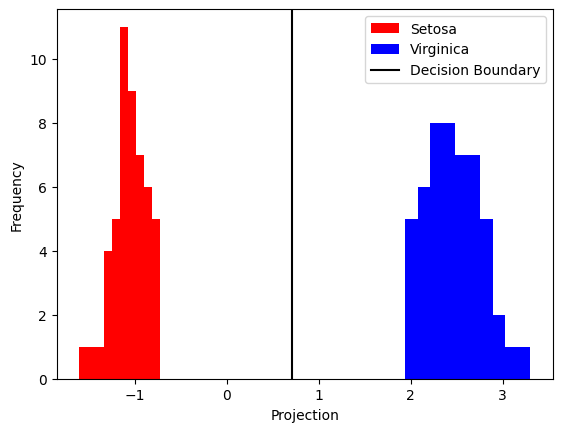

In [ ]:
#Plot the histogram of the projected data and the classification boundary.
#Use matplot lib for plotting.
#while plotting histogram give different color for different classes and also add legend.
#you can refer :- https://matplotlib.org/stable/gallery/text_labels_and_annotations/index.html

import matplotlib.pyplot as plt

data_0 = [np.dot(w.T,x) for x in X_train[:50]]
data_2 = [np.dot(w.T,x) for x in X_train[50:]]

plt.hist(data_0, color='red', label='Setosa')
plt.hist(data_2, color='blue', label='Virginica')

plt.axvline(x = -b, color='black', label='Decision Boundary')

plt.xlabel('Projection')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Part B: Fisher on custom Dataset

In [ ]:
#Load train Dataset
# help(AIML_A1.q3_get_data)
data_for_fisher = AIML_A1.q3_get_data(mysrn)
print(data_for_fisher)

[(array([-0.06892003,  0.36129145]), 1.0), (array([-0.72896863, -0.68454711]), 0.0), (array([-0.48175367,  0.87630668]), 0.0), (array([0.23444856, 0.28339963]), 1.0), (array([0.90482705, 0.42577929]), 0.0), (array([0.36780631, 0.        ]), 1.0), (array([-0.80901699,  0.58778525]), 0.0), (array([ 0.63742399, -0.77051324]), 0.0), (array([ 0.06279052, -0.99802673]), 0.0), (array([-0.24868989, -0.96858316]), 0.0), (array([-0.15660431, -0.3328011 ]), 1.0), (array([-0.99802673, -0.06279052]), 0.0), (array([-0.12533323, -0.9921147 ]), 0.0), (array([-0.96858316, -0.24868989]), 0.0), (array([-0.68454711, -0.72896863]), 0.0), (array([-0.68454711,  0.72896863]), 0.0), (array([ 0.18738131, -0.98228725]), 0.0), (array([ 0.80901699, -0.58778525]), 0.0), (array([-0.95105652,  0.30901699]), 0.0), (array([0.53582679, 0.84432793]), 0.0), (array([-0.32231113,  0.17719204]), 1.0), (array([-0.53582679, -0.84432793]), 0.0), (array([0.06279052, 0.99802673]), 0.0), (array([0.87630668, 0.48175367]), 0.0), (ar

In [ ]:
#Find Normalized Projection vestor w and check if the data is linealrly separable.

data_0 = np.array([data_for_fisher[i][0] for i in range(len(data_for_fisher)) if data_for_fisher[i][1] == 0])
data_1 = np.array([data_for_fisher[i][0] for i in range(len(data_for_fisher)) if data_for_fisher[i][1] == 1])

u_0 = np.mean(data_0, axis=0)
u_1 = np.mean(data_1, axis=0)

c_0 = np.cov(data_0.T)
c_1 = np.cov(data_1.T)

print(u_0,u_1)
print(c_0)
print(c_1)

[4.99600361e-17 2.63677968e-17] [ 1.49880108e-17 -5.55111512e-18]
[[5.05050505e-01 4.49180132e-18]
 [4.49180132e-18 5.05050505e-01]]
[[6.90211637e-02 2.61041869e-18]
 [2.61041869e-18 6.90211637e-02]]


In [ ]:
w = np.dot(np.linalg.inv(c_0 + c_1),u_1 - u_0)
w = w / np.linalg.norm(w)  # normalising
print(w)

[-0.73861239 -0.67413036]


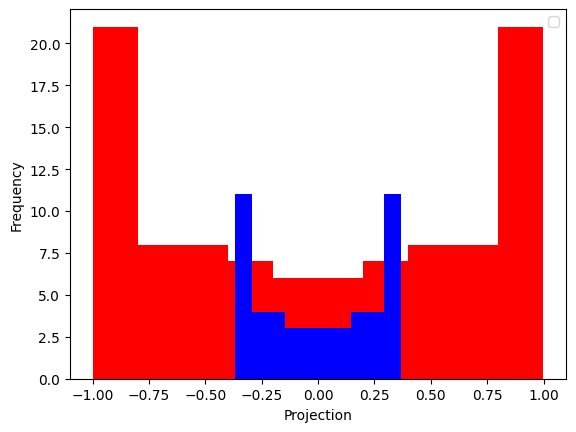

In [ ]:
data_0 = [np.dot(w.T,x) for x in data_0]
data_1 = [np.dot(w.T,x) for x in data_1]

plt.hist(data_0, color='red')
plt.hist(data_1, color='blue')

plt.xlabel('Projection')
plt.ylabel('Frequency')
plt.legend()
plt.show()  # not linearly separable

In [ ]:
#Transform the data to \phi(X) as explained and find w and b

def phi(x):
  transform = [x[0],x[1],x[0]**2,x[1]**2]
  return np.array(transform)

transformed_data = [[phi(x[0]),x[1]] for x in data_for_fisher]

In [ ]:
data_0 = np.array([transformed_data[i][0] for i in range(len(transformed_data)) if transformed_data[i][1] == 0])
data_1 = np.array([transformed_data[i][0] for i in range(len(transformed_data)) if transformed_data[i][1] == 1])

u_0 = np.mean(data_0, axis=0)
u_1 = np.mean(data_1, axis=0)

c_0 = np.cov(data_0.T)
c_1 = np.cov(data_1.T)

print(u_0,u_1)
print(c_0)
print(c_1)

[4.99600361e-17 2.63677968e-17 5.00000000e-01 5.00000000e-01] [ 1.49880108e-17 -5.55111512e-18  6.76407405e-02  6.76407405e-02]
[[ 5.05050505e-01  4.49180132e-18  4.42012213e-17 -3.85940343e-17]
 [ 4.49180132e-18  5.05050505e-01 -1.14183654e-17  5.25045973e-18]
 [ 4.42012213e-17 -1.14183654e-17  1.26262626e-01 -1.26262626e-01]
 [-3.85940343e-17  5.25045973e-18 -1.26262626e-01  1.26262626e-01]]
[[ 6.90211637e-02  2.61041869e-18  2.54151354e-18 -2.61981252e-18]
 [ 2.61041869e-18  6.90211637e-02  3.88525119e-19 -9.63539806e-19]
 [ 2.54151354e-18  3.88525119e-19  2.33432131e-03 -2.33432131e-03]
 [-2.61981252e-18 -9.63539806e-19 -2.33432131e-03  2.33432131e-03]]


In [ ]:
w = np.dot(np.linalg.inv(c_0 + c_1 + np.diag([10**(-10)]*len(c_0))),u_1 - u_0)  # added a small offset since c_0 + c_1 is singular
w = w / np.linalg.norm(w)  # normalising
w = np.round(w,5)
print(w)

[ 0.      -0.      -0.70711 -0.70711]


In [ ]:
b = -1*np.dot(w.T,0.5*(u_0 + u_1))  # midpoint
print(b)

def classifier(x,b):
  f = np.dot(w,x) + b
  if f > 0:
    return 1
  return 0

error = 0
for i in range(len(transformed_data)):
  x = transformed_data[i][0]
  if classifier(x,b) != transformed_data[i][1]:
    error += 1

print(error)  # no errors

0.40138444398314743
0


[-0.7071100000000001, -0.70711, -0.70711, -0.7071100000000001, -0.70711, -0.70711, -0.70711, -0.70711, -0.70711, -0.70711, -0.7071099999999999, -0.7071099999999999, -0.70711, -0.70711, -0.70711, -0.70711, -0.70711, -0.70711, -0.70711, -0.70711, -0.70711, -0.70711, -0.7071099999999999, -0.70711, -0.7071099999999999, -0.70711, -0.7071099999999999, -0.7071100000000001, -0.7071100000000001, -0.70711, -0.70711, -0.7071100000000001, -0.7071100000000001, -0.70711, -0.70711, -0.70711, -0.7071099999999999, -0.70711, -0.70711, -0.70711, -0.70711, -0.70711, -0.7071099999999999, -0.7071100000000001, -0.70711, -0.70711, -0.7071099999999999, -0.7071099999999999, -0.70711, -0.7071099999999999, -0.7071100000000001, -0.70711, -0.70711, -0.70711, -0.7071100000000001, -0.7071100000000001, -0.7071100000000001, -0.70711, -0.7071099999999999, -0.7071100000000001, -0.70711, -0.70711, -0.7071099999999999, -0.70711, -0.7071099999999999, -0.70711, -0.7071099999999999, -0.70711, -0.70711, -0.70711, -0.7071100000

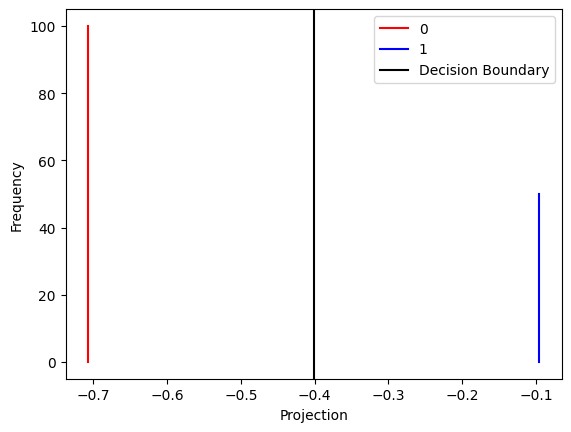

In [ ]:
#Plot original data along with classifier boundary

new_data_0 = [np.dot(w.T,x) for x in data_0]
new_data_1 = [np.dot(w.T,x) for x in data_1]

print(new_data_0)  # points very close to each other
print(new_data_1)  # histogram barely visible

# plt.hist(data_0, color='red')
# plt.hist(data_1, color='blue')

v_0 = np.mean(new_data_0)
v_1 = np.mean(new_data_1)
plt.plot([v_0,v_0],[0,len(new_data_0)], color='red', label='0')
plt.plot([v_1,v_1],[0,len(new_data_1)], color='blue', label='1')

plt.axvline(x = -b, color = 'black', label = 'Decision Boundary')

plt.xlabel('Projection')
plt.ylabel('Frequency')
plt.legend()
plt.show()  # linearly separable

In [ ]:
#Load Test dataset
# help(AIML_A1.q3_get_test_data)
test_data_for_fisher = AIML_A1.q3_get_test_data(mysrn)

In [ ]:
#Find Test Accuracy for various values of thresholds as explained.
values = [b-0.3, b-0.2, b-0.1, b, b+0.1, b+0.2, b+0.3]
results = []

for i in range(len(values)):
  error = 0
  p = values[i]
  for i in range(len(test_data_for_fisher)):
    x = test_data_for_fisher[i][0]
    if classifier(phi(x),p) != test_data_for_fisher[i][1]:
      error += 1
  results.append(np.round(1 - error/len(test_data_for_fisher),3))

print(results)

[0.7, 0.87, 0.94, 0.93, 0.93, 0.85, 0.8]


# Question 4 : Logistic Regression

In [4]:
#Loading Dataset
import numpy as np
import csv

#Loading Data
with open('diabetes.csv', 'r') as f:
    reader = csv.reader(f)
    diabetes_data = list(reader)
diabetes_data = np.array(diabetes_data)

diabetes_data =  diabetes_data[1:,]

In [19]:
#Import required modules for logistic regression from scikit-learn
from sklearn.linear_model import LogisticRegression

In [12]:
# Implement K-Fold Cross Validation K=6
x = np.array([i[0:len(i)-1] for i in diabetes_data],dtype=np.float64)
y = np.array([i[-1] for i in diabetes_data],dtype=np.float64)

def k_cross_validation(x,y,k):
  x_folds = np.array_split(x, k)
  y_folds = np.array_split(y, k)
  accuracy = []

  for i in range(k):
    x_test = x_folds[i]
    y_test = y_folds[i]
    x_train = np.concatenate([x_folds[j] for j in range(k) if j != i])
    y_train = np.concatenate([y_folds[j] for j in range(k) if j != i])
    model = LogisticRegression()
    model.fit(x_train, y_train)
    accuracy.append(model.score(x_test, y_test))
  return accuracy

In [13]:
accuracy = []
k = 6

for i in range(k):
  x_train = np.append(x[:len(x)//k*i], (x[len(x)//k*(i+1):]), axis=0)
  y_train = np.append(y[:len(y)//k*i], (y[len(y)//k*(i+1):]))

  x_test = x[len(x)//k*i:len(x)//k*(i+1)]
  y_test = y[len(y)//k*i:len(y)//k*(i+1)]

  model = LogisticRegression()
  model.fit(x_train,y_train)
  accuracy.append(model.score(x_test,y_test))

accuracy = np.mean(accuracy)
print(accuracy)

print(k_cross_validation(x,y,k))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.7783333333333333
[0.74, 0.81, 0.72, 0.77, 0.75, 0.88]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [14]:
# Evaluate Confusion Matrix for every K Model
def confusion_matrix(y_test,y_pred):
  matrix = np.zeros((2,2))
  for i in range(len(y_test)):
    matrix[int(y_test[i]), int(y_pred[i])] += 1
  return matrix

In [15]:
conf_matrix = np.zeros((k,2,2))

for i in range(k):
  x_train = np.append(x[:len(x)//k*i], (x[len(x)//k*(i+1):]), axis=0)
  y_train = np.append(y[:len(y)//k*i], (y[len(y)//k*(i+1):]))

  x_test = x[len(x)//k*i:len(x)//k*(i+1)]
  y_test = y[len(y)//k*i:len(y)//k*(i+1)]

  model = LogisticRegression()
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  conf_matrix[i] = confusion_matrix(y_test,y_pred)

print(conf_matrix)

[[[54.  9.]
  [17. 20.]]

 [[59.  3.]
  [16. 22.]]

 [[48. 13.]
  [15. 24.]]

 [[57.  5.]
  [18. 20.]]

 [[59. 11.]
  [14. 16.]]

 [[72.  2.]
  [10. 16.]]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [16]:
recall = []
precision = []
accuracy = []
f1 = []

for i in range(k):
  x_train = np.append(x[:len(x)//k*i], (x[len(x)//k*(i+1):]), axis=0)
  y_train = np.append(y[:len(y)//k*i], (y[len(y)//k*(i+1):]))

  x_test = x[len(x)//k*i:len(x)//k*(i+1)]
  y_test = y[len(y)//k*i:len(y)//k*(i+1)]
  model = LogisticRegression()
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)

  ap = model.score(x_test,y_test)
  tp = np.sum(y_test * y_pred)
  fp = np.sum((1-y_test) * y_pred)
  fn = np.sum(y_test * (1-y_pred))

  recall.append(tp/(tp + fn))
  precision.append(tp/(tp + fp))
  accuracy.append(ap)
  f1.append(2*precision[i]*recall[i]/(precision[i] + recall[i]))

print(recall)
print(precision)
print(accuracy)
print(f1)

[0.5405405405405406, 0.5789473684210527, 0.6153846153846154, 0.5263157894736842, 0.5333333333333333, 0.6153846153846154]
[0.6896551724137931, 0.88, 0.6486486486486487, 0.8, 0.5925925925925926, 0.8888888888888888]
[0.74, 0.81, 0.72, 0.77, 0.75, 0.88]
[0.6060606060606061, 0.6984126984126985, 0.631578947368421, 0.6349206349206348, 0.5614035087719299, 0.7272727272727274]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

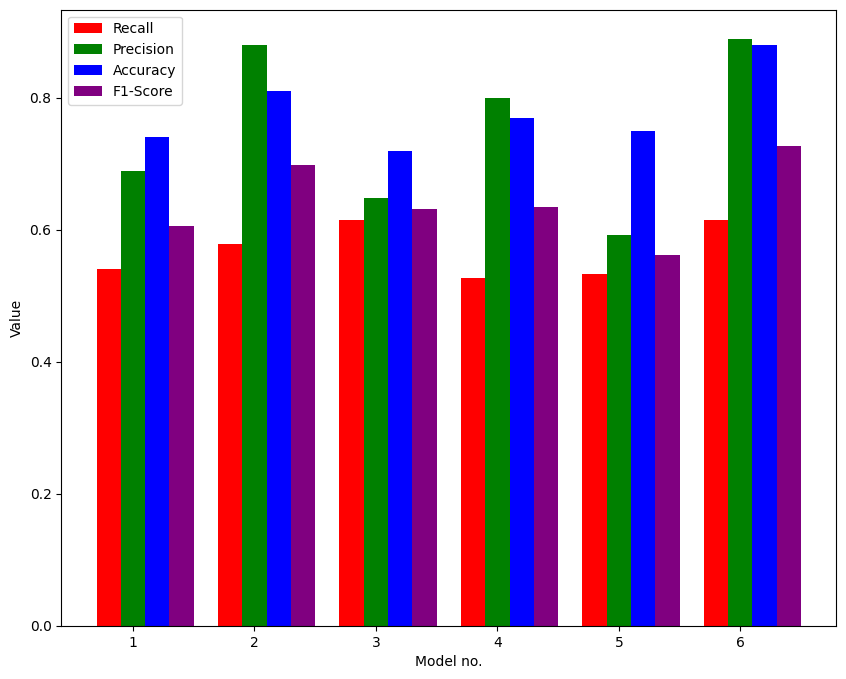

In [18]:
# Plot barplot for all metrics using matplotlib
import matplotlib.pyplot as plt

barWidth = 0.20

bar1 = np.arange(len(recall))
bar2 = [x + barWidth for x in bar1]
bar3 = [x + barWidth for x in bar2]
bar4 = [x + barWidth for x in bar3]

fig = plt.subplots(figsize =(10, 8))

plt.bar(bar1, recall, color ='red', width = barWidth, label ='Recall')
plt.bar(bar2, precision, color ='green', width = barWidth, label ='Precision')
plt.bar(bar3, accuracy, color ='blue', width = barWidth, label ='Accuracy')
plt.bar(bar4, f1, color ='purple', width = barWidth, label ='F1-Score')

plt.xlabel('Model no.')
plt.ylabel('Value')

plt.xticks([i + barWidth for i in range(len(recall))], ['1','2','3','4','5','6'])
plt.legend()
plt.show()

In [22]:
# Load testdata
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/q4testdata_999601410.csv .
with open('q4testdata_999601410.csv', 'r') as f:
    reader = csv.reader(f)
    test_data = list(reader)
test_data = np.array(test_data)

test_data =  test_data[1:,]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
#Predict testdata and save into test_result.csv
x = np.array([i[0:len(i)-1] for i in test_data],dtype=np.float64)
y = np.array([i[-1] for i in test_data],dtype=np.float64)

k = 6
y_pred = []

for i in range(k):
  x_train = np.append(x[:len(x)//k*i], (x[len(x)//k*(i+1):]), axis=0)
  y_train = np.append(y[:len(y)//k*i], (y[len(y)//k*(i+1):]))

  x_test = x[len(x)//k*i:len(x)//k*(i+1)]
  y_test = y[len(y)//k*i:len(y)//k*(i+1)]

  model = LogisticRegression()
  model.fit(x_train,y_train)
  y_pred.append(model.predict(x))

model = LogisticRegression()
model.fit(x,y)
y_pred.append(model.predict(x))

# y_pred is name for prediction data
y_pred = np.array(y_pred)

np.savetxt('test_result.csv', y_pred, delimiter = ',')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c